# Oil Spill Detection - Dataset Overview

**Project**: AI-Powered Oil Spill Detection using Satellite Imagery  
**Milestone 1**: Data Collection, Exploration and Preprocessing  
**Notebook**: Dataset Overview and Initial Exploration

## Objectives
- Load and explore the oil spill dataset structure
- Analyze dataset balance (spill vs non-spill images)
- Visualize sample images and corresponding masks
- Document key dataset characteristics

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


In [19]:
#dataset paths
DATASET_ROOT = Path('../dataset')
TRAIN_IMAGES = DATASET_ROOT / 'train' / 'images'
TRAIN_MASKS = DATASET_ROOT / 'train' / 'masks'
VAL_IMAGES = DATASET_ROOT / 'val' / 'images'
VAL_MASKS = DATASET_ROOT / 'val' / 'masks'
TEST_IMAGES = DATASET_ROOT / 'test' / 'images'
TEST_MASKS = DATASET_ROOT / 'test' / 'masks'

#results
RESULTS_DIR = Path('../results/overview')
RESULTS_DIR.mkdir(exist_ok=True)

print(f"Dataset root: {DATASET_ROOT}")
print(f"Results directory: {RESULTS_DIR}")

Dataset root: ..\dataset
Results directory: ..\results\overview


In [ ]:
def count_files(directory):
    if directory.exists():
        return len([f for f in directory.iterdir() if f.is_file()])
    return 0

dataset_stats = {
    'Split': ['Train', 'Validation', 'Test'],
    'Images': [count_files(TRAIN_IMAGES), count_files(VAL_IMAGES), count_files(TEST_IMAGES)],
    'Masks': [count_files(TRAIN_MASKS), count_files(VAL_MASKS), count_files(TEST_MASKS)]
}

df_stats = pd.DataFrame(dataset_stats)

df_stats.to_csv(RESULTS_DIR / 'dataset_statistics.csv', index=False)

from IPython.display import display
styled_stats = (
    df_stats.style
    .set_caption("Dataset Image & Mask Counts")
    .set_properties(**{'background-color': '#f0f8ff',
                       'color': 'black',
                       'border': '1px solid black'})
    .hide(axis="index")
)
display(styled_stats)

Split,Images,Masks
Train,811,811
Validation,203,203
Test,254,254


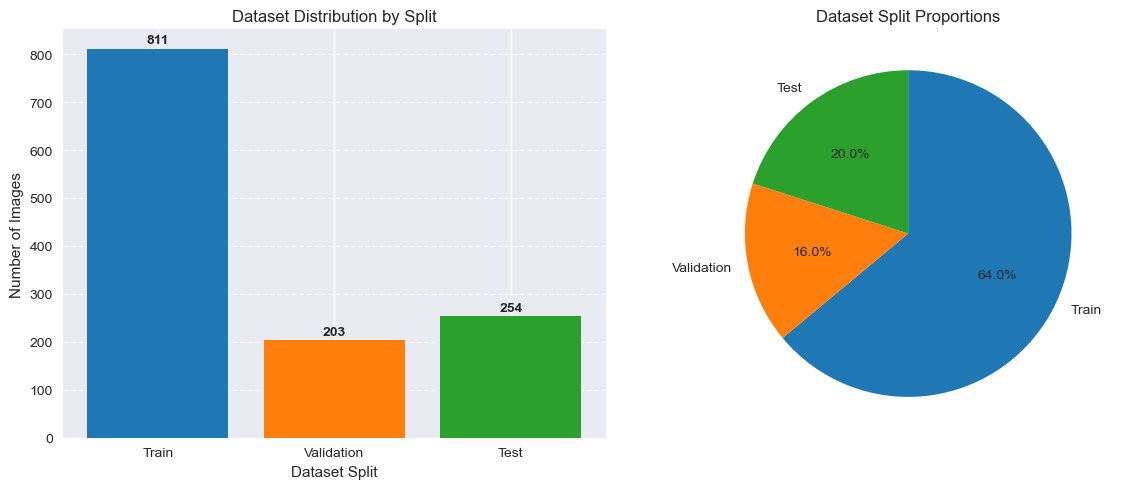

Dataset distribution plot saved to ..\results\overview\dataset_distribution.png


In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bars = ax1.bar(df_stats['Split'], df_stats['Images'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Dataset Distribution by Split')
ax1.set_ylabel('Number of Images')
ax1.set_xlabel('Dataset Split')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.pie(df_stats['Images'], labels=df_stats['Split'], autopct='%1.1f%%', 
        startangle=90, counterclock=False,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Dataset Split Proportions')

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Dataset distribution plot saved to {RESULTS_DIR / 'dataset_distribution.png'}")


Training Set Samples:


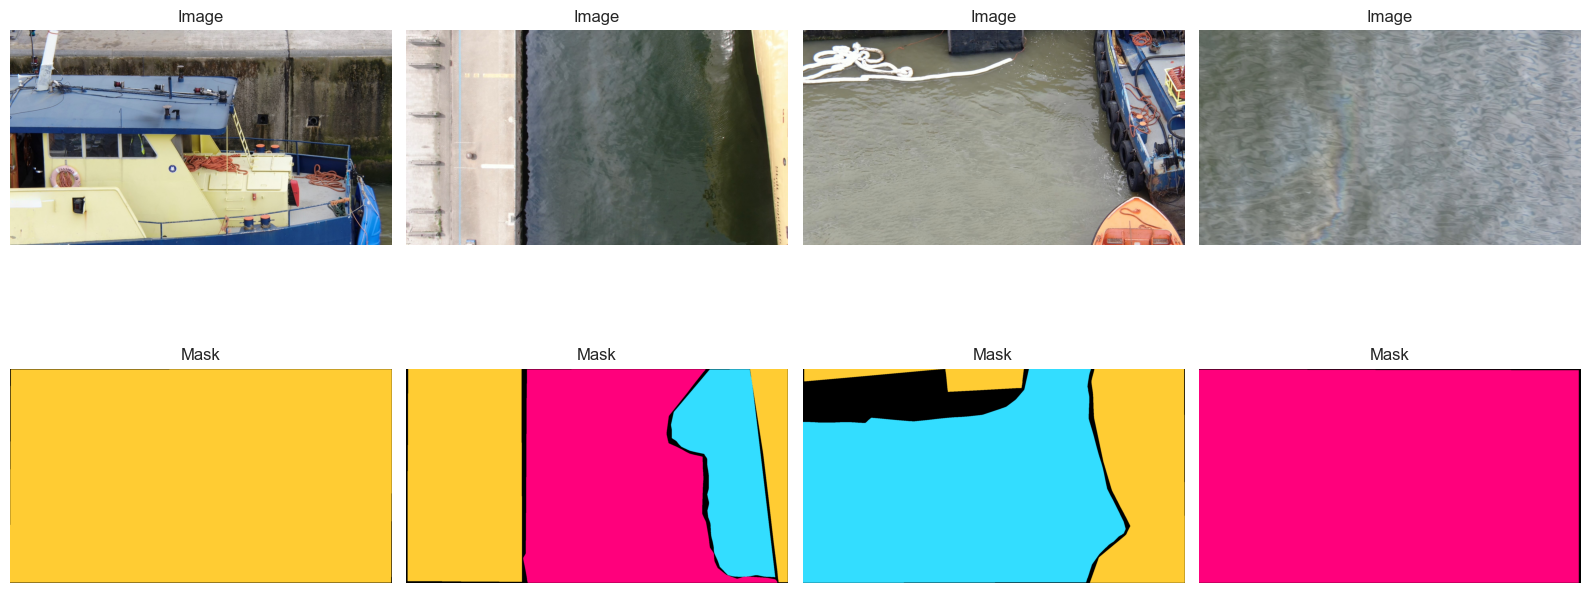

Training samples saved to ..\results\overview\train_samples.png


In [27]:
def display_sample_images(image_dir, mask_dir, num_samples=4, seed=42):
    np.random.seed(seed)
    image_files = list(image_dir.glob('*'))
    
    if len(image_files) == 0:
        print(f"No images found in {image_dir}")
        return
    
    sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)
    
    fig, axes = plt.subplots(2, num_samples, figsize=(16, 8))
    
    for i, img_path in enumerate(sample_files):
        image = Image.open(img_path)
        
        mask_path = mask_dir / (img_path.stem + '.png')
        
        axes[0, i].imshow(image)
        axes[0, i].set_title('Image')
        axes[0, i].axis('off')
        
        if mask_path.exists():
            mask = Image.open(mask_path)
            axes[1, i].imshow(mask, cmap='gray')
            axes[1, i].set_title('Mask')
        else:
            axes[1, i].text(0.5, 0.5, 'No Mask', ha='center', va='center')
            axes[1, i].set_title('Mask Not Found')
        
        axes[1, i].axis('off')
    
    plt.tight_layout()
    return fig

print("Training Set Samples:")
fig_train = display_sample_images(TRAIN_IMAGES, TRAIN_MASKS, 4)
if fig_train:
    fig_train.savefig(RESULTS_DIR / 'train_samples.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Training samples saved to {RESULTS_DIR / 'train_samples.png'}")


Analyzing Training Dataset...

Training Images Summary


,width,height,channels,file_size_mb
count,811.000000,811.000000,811.000000,811.000000
mean,1950.360000,1102.620000,3.000000,0.870000
std,593.870000,366.440000,0.000000,1.140000
min,768.000000,432.000000,3.000000,0.110000
25%,1920.000000,1080.000000,3.000000,0.570000
50%,1920.000000,1080.000000,3.000000,0.670000
75%,1920.000000,1080.000000,3.000000,0.840000
max,5184.000000,3888.000000,3.000000,11.510000



Training Masks Summary


,width,height,channels,file_size_mb
count,811.000000,811.000000,811.000000,811.000000
mean,1950.360000,1102.620000,3.000000,0.030000
std,593.870000,366.440000,0.000000,0.020000
min,768.000000,432.000000,3.000000,0.000000
25%,1920.000000,1080.000000,3.000000,0.020000
50%,1920.000000,1080.000000,3.000000,0.030000
75%,1920.000000,1080.000000,3.000000,0.030000
max,5184.000000,3888.000000,3.000000,0.150000



Unique Image Sizes: 6
Unique Mask Sizes: 6


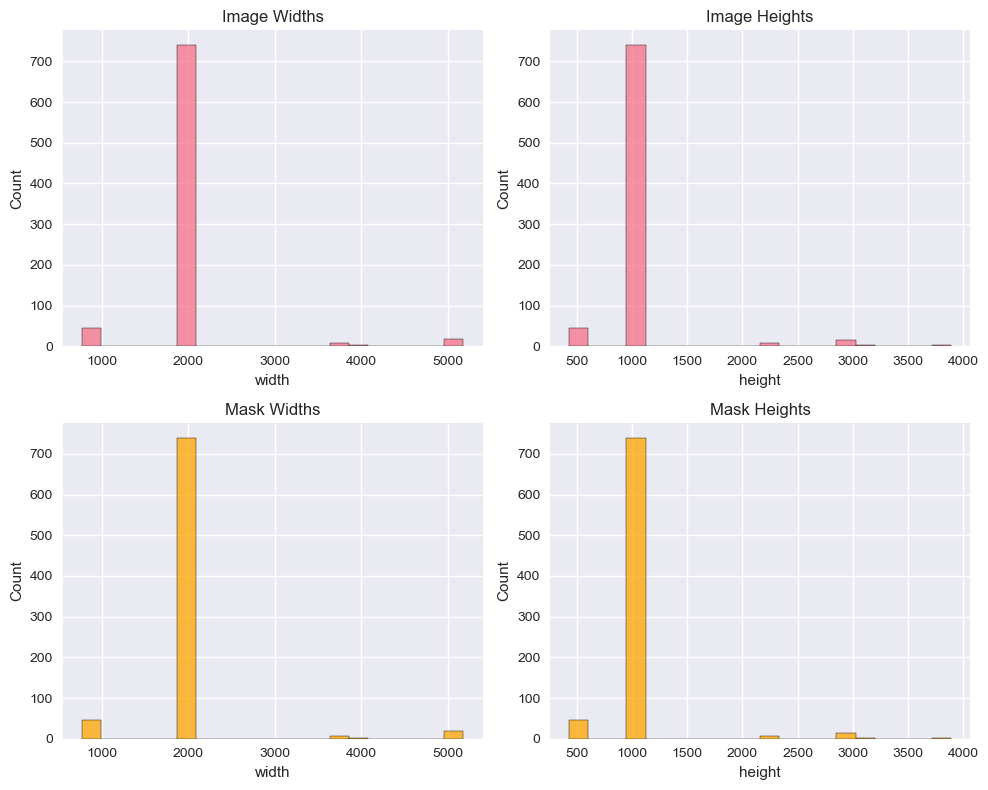

In [32]:
def analyze_image_properties(image_dir, sample_size=None):
    files = list(image_dir.glob('*'))
    if sample_size:
        files = files[:sample_size]

    data = []
    for f in files:
        try:
            with Image.open(f) as img:
                w, h = img.size
                c = len(img.getbands())
            size_mb = f.stat().st_size / (1024 * 1024)
            data.append([f.name, w, h, c, size_mb])
        except Exception as e:
            print(f"Skipping {f}: {e}")
    
    return pd.DataFrame(data, columns=["filename", "width", "height", "channels", "file_size_mb"])

if TRAIN_IMAGES.exists():
    print("Analyzing Training Dataset...")

    img_df = analyze_image_properties(TRAIN_IMAGES)
    mask_df = analyze_image_properties(TRAIN_MASKS)

    img_df.to_csv(RESULTS_DIR / "train_image_properties.csv", index=False)
    mask_df.to_csv(RESULTS_DIR / "train_mask_properties.csv", index=False)

    img_summary = img_df[["width", "height", "channels", "file_size_mb"]].describe().round(2)
    mask_summary = mask_df[["width", "height", "channels", "file_size_mb"]].describe().round(2)

    print("\nTraining Images Summary")
    display(img_summary.style.background_gradient(cmap="Blues").set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]}]
    ))

    print("\nTraining Masks Summary")
    display(mask_summary.style.background_gradient(cmap="Oranges").set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]}]
    ))

    unique_imgs = img_df[['width','height']].drop_duplicates()
    unique_masks = mask_df[['width','height']].drop_duplicates()
    print(f"\nUnique Image Sizes: {len(unique_imgs)}")
    print(f"Unique Mask Sizes: {len(unique_masks)}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    sns.histplot(img_df['width'], bins=20, ax=axes[0,0]); axes[0,0].set_title("Image Widths")
    sns.histplot(img_df['height'], bins=20, ax=axes[0,1]); axes[0,1].set_title("Image Heights")
    sns.histplot(mask_df['width'], bins=20, ax=axes[1,0], color="orange"); axes[1,0].set_title("Mask Widths")
    sns.histplot(mask_df['height'], bins=20, ax=axes[1,1], color="orange"); axes[1,1].set_title("Mask Heights")

    plt.tight_layout()
    plt.savefig(RESULTS_DIR / "image_mask_properties.png", dpi=300)
    plt.show()

else:
    print("Training images directory not found.")


## Summary


1. **Dataset Structure**: Analyzed the train/validation/test split distribution
2. **Sample Visualization**: Displayed sample images with corresponding masks
3. **Image Properties**: Analyzed dimensions, channels, and file sizes
4. **Documentation**: Saved all statistics and visualizations to results directory
